## <p><b>                                    FEATURE ENGINEERING       </b></p>

Feature engineering includes
* Feature construction
* Feature extraction
* Feature selection
* Feature scaling
These all are used to make the data suitable to feed to the machine learning algorithm to make the machine learning algoritm perform better. Example: Large no of dimension may cause the machine learning algorithm overfit and may not work better thus the <b>Feature extraction </b> is done in this case. Similary, in the dataset with multiple features, the scale of the data may cause one feature to be overly important. 

## <b> FEATURE SCALING <b> 


Feature scaling is a technique to standardize the independent features present in the data in a fixed range.

Types of feature scaling:
* feature standardization(z-score noramalization)
* feature normalization


### Standardization
$$ X'= \frac{X-\mu}{\sigma}

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
ads=pd.read_csv('advertising.csv')
X_data=ads.iloc[:,:4]
Y_data=ads['Clicked on Ad']

In [71]:
X_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35,61833.90,256.09
1,80.23,31,68441.85,193.77
2,69.47,26,59785.94,236.50
3,74.15,29,54806.18,245.89
4,68.37,35,73889.99,225.58


In [72]:
Y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.3,random_state=20)

In [74]:
X_train.shape,X_test.shape

((700, 4), (300, 4))

In [75]:
Y_train.shape

(700,)

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [77]:
scaler.mean_

array([6.49682000e+01, 3.61000000e+01, 5.45113402e+04, 1.79897671e+02])

In [78]:
X_train_scaled

array([[ 1.18647074, -0.58579795,  0.70621484,  0.23399754],
       [-1.860754  ,  1.02227486, -0.57443344, -0.61114257],
       [ 1.32463839, -0.47093561,  0.52094974, -0.02209867],
       ...,
       [ 0.50693711,  0.10337611,  1.40905844,  0.94690793],
       [-1.09831978, -0.58579795, -1.84817168, -0.87153343],
       [ 1.38932597, -0.01148623,  0.23705799,  0.95120257]])

In [79]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [80]:
X_train_scaled.head()
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [81]:
X_test_scaled.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,0.733658,-0.585798,0.485419,1.323028
1,0.206108,-0.356073,1.614262,0.428613
2,0.116928,1.137137,1.716516,0.367810
3,0.373794,0.562825,-0.331813,-1.621513
4,-1.715678,1.711449,-0.297911,-0.420596


In [82]:
np.round(X_train_scaled.describe(),1)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,700.0,700.0,700.0,700.0
mean,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0
min,-2.0,-2.0,-2.9,-1.7
25%,-0.8,-0.8,-0.6,-0.9
50%,0.2,-0.1,0.2,0.1
75%,0.9,0.7,0.8,0.9
max,1.7,2.9,1.8,2.0


In [83]:
np.round(X_train.describe(),1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,700.0,700.0,700.0,700.0
mean,65.0,36.1,54511.3,179.9
std,15.9,8.7,13618.9,44.3
min,32.6,19.0,14548.1,104.8
25%,51.7,29.0,46460.5,138.9
50%,68.1,35.0,56735.5,184.1
75%,78.7,42.0,64927.8,219.5
max,91.4,61.0,79332.3,270.0


## <b> Effects of scaling </b>

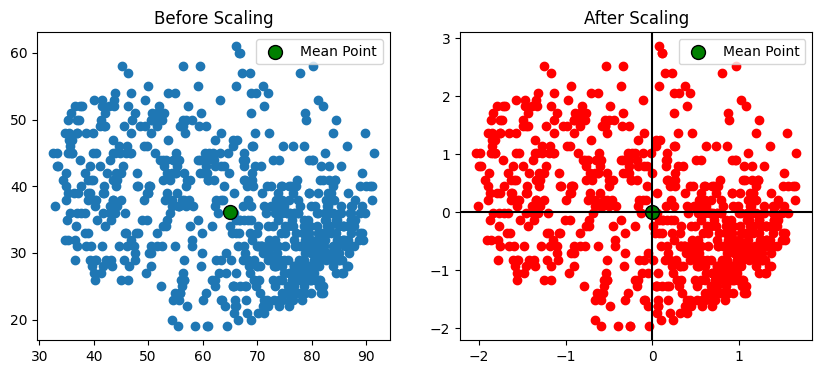

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.scatter(X_train['Daily Time Spent on Site'], X_train['Age'])
ax1.scatter(X_train['Daily Time Spent on Site'].mean(), X_train['Age'].mean(), color='green', edgecolor='black', s=100, label='Mean Point')
ax2.scatter(X_train_scaled['Daily Time Spent on Site'], X_train_scaled['Age'], color='red')
ax2.scatter(X_train_scaled['Daily Time Spent on Site'].mean(),X_train_scaled['Age'].mean(),color='green',edgecolor='black',s=100,label='Mean Point')
ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')
ax2.axvline(0, -2, 3,color='black')
ax2.axhline(0, 1, 0,color='black')
ax1.legend()
ax2.legend()
plt.show()


In the figure above, we can see that the mean is centered to zero after scaling and less deviated from mean with no change in the realtive postion of the points. It does not change the distribution from how it was before but it increases the model performance. 

It does not reduce the impact of the outliers.

Text(0.5, 0.98, 'No change of the distribution of the individual plots')

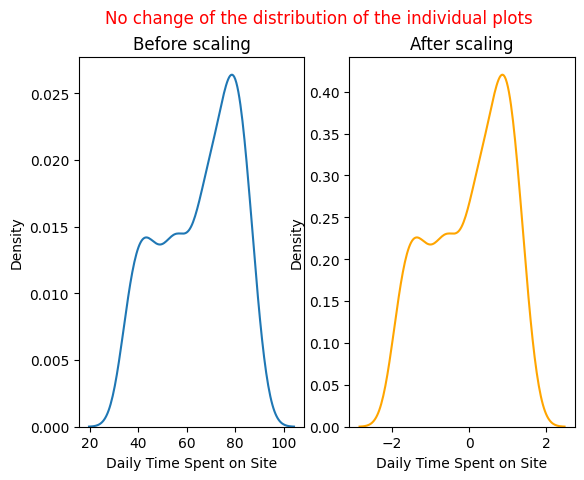

In [85]:
plt.subplot(1,2,1)
sns.kdeplot(data=X_train,x=X_train['Daily Time Spent on Site'])
plt.title('Before scaling')

plt.subplot(1,2,2)
sns.kdeplot(data=X_train_scaled,x=X_train_scaled['Daily Time Spent on Site'],color='orange')
plt.title('After scaling')

plt.suptitle('No change of the distribution of the individual plots',color='red')

### Normalization

Normalization is the process of changing the values of the numeric columns in the dataset to use a common scale, without distorting the raltive postion. 

In [86]:
ads.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


1. MIN MAX SCALING
$$ X'=\frac{X-X_{min}}{X_{max}-X_{min}}


In [87]:
X_train


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
140,83.86,31,64122.36,190.25
409,35.34,45,46693.76,152.86
63,86.06,32,61601.05,178.92
178,44.57,31,38349.78,133.17
732,83.16,41,70185.06,194.95
...,...,...,...,...
924,59.64,51,71455.62,153.12
223,60.94,41,76893.84,154.97
271,73.04,37,73687.50,221.79
474,47.48,31,29359.20,141.34


In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test,X_test.columns)

In [89]:
X_train_scaled.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,0.872214,0.285714,0.765221,0.517436
1,0.046622,0.619048,0.496196,0.291076
2,0.909648,0.309524,0.726303,0.448844
3,0.203675,0.285714,0.367400,0.171873
4,0.860303,0.523810,0.858804,0.545889


In [90]:
np.round(X_train.describe(),1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,700.0,700.0,700.0,700.0
mean,65.0,36.1,54511.3,179.9
std,15.9,8.7,13618.9,44.3
min,32.6,19.0,14548.1,104.8
25%,51.7,29.0,46460.5,138.9
50%,68.1,35.0,56735.5,184.1
75%,78.7,42.0,64927.8,219.5
max,91.4,61.0,79332.3,270.0


In [91]:
np.round(X_train_scaled.describe(),1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,700.0,700.0,700.0,700.0
mean,0.6,0.4,0.6,0.5
std,0.3,0.2,0.2,0.3
min,0.0,0.0,0.0,0.0
25%,0.3,0.2,0.5,0.2
50%,0.6,0.4,0.7,0.5
75%,0.8,0.5,0.8,0.7
max,1.0,1.0,1.0,1.0


PLOTS BEFORE AND AFTER SCALING


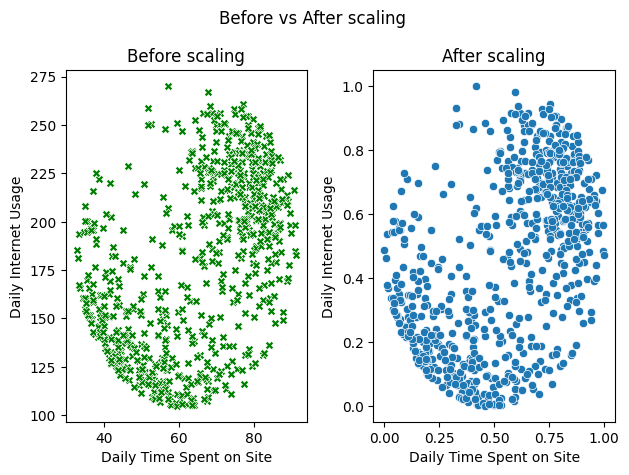

In [92]:
plt.subplot(1,2,1)
sns.scatterplot(data=X_train,x='Daily Time Spent on Site',y='Daily Internet Usage',marker='X',color='green')
plt.title('Before scaling')

plt.subplot(1,2,2)
sns.scatterplot(data=X_train_scaled,x='Daily Time Spent on Site',y='Daily Internet Usage')
plt.title('After scaling')

plt.suptitle('Before vs After scaling ')
plt.tight_layout()

plt.show()


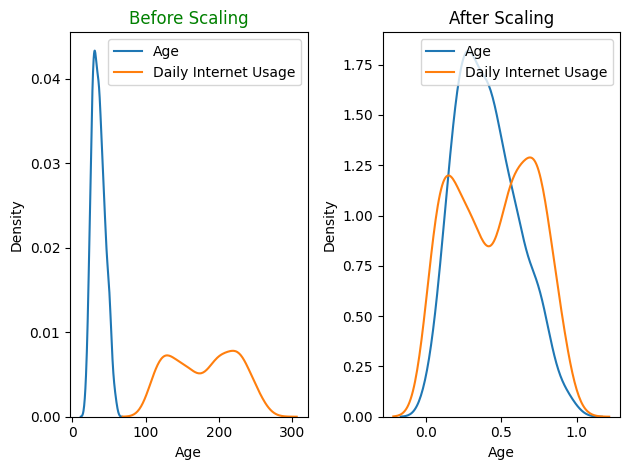

In [93]:
plt.subplot(1, 2, 1)
sns.kdeplot(X_train['Age'], label='Age')
sns.kdeplot(X_train['Daily Internet Usage'], label='Daily Internet Usage')
plt.title('Before Scaling',color='green')
plt.legend()


plt.subplot(1, 2, 2)
sns.kdeplot(X_train_scaled['Age'], label='Age')
sns.kdeplot(X_train_scaled['Daily Internet Usage'], label='Daily Internet Usage')
plt.title('After Scaling')
plt.legend()

plt.tight_layout()
plt.show()

The advantage is that now both the variables are on the same scale which will help in better fittin as the large scale previously may dominate over the smaller scales